# Assignment 4
| Topic | Information |
| --------  |  -------- |
| Team Members       | Antonio Cascio & Krystian Confeiteiro |
| Professor  | Dr. Jack |
| Course     | DS 440 - 01DB |
| Assignment | Assignment 4 |
| Date       | 09/29/2023 (submitted **10/03/2023**) |

## Assignment Objective
Use [seaborn](https://seaborn.pydata.org/) to do [explorative data analysis (EDA)](https://en.wikipedia.org/wiki/Exploratory_data_analysis) with this `.csv` file in Google Colab, generate 5 different graphs and explain the results in the resultant graphs using the flight delay statistics of flights from Daytona Beach to ATL and CLT are recorded from [FAA ASPM website](https://aspm.faa.gov/apm/sys/main.asp) and saved in `DS440_assignment4_data_FA23.csv` from the [DS 440 - Assignment 4 FA23 Canvas page](https://erau.instructure.com/courses/163647/assignments/3312890#submit). You can *also* download the data from in our [Assignment 4 Google Drive folder](https://drive.google.com/drive/folders/1wWIdr0zu7_Q7yCXqqM01zviF58LwTHqo?usp=sharing).

# Assignment Layout
- Part 1
  - Reading & analysis of data
  - Discuss analysis of the data
- Part 2
  - Plotting & data visualization
  - Make five plots and discuss them

## Part Sources
### Part 1
- Type(s) of statistical analysis
    - Descriptive statistics
    - Probability distributions
    - Multivariate analysis
- Types of plots
  1. Heatmap 
  2. Horizontal bar plot 
  3. Conditional kernel density estimate 
  4. Diagonal correlation matrix 
  5. Histogram 

# Assignment Checklist
- Read the dataset with [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) or [seaborn](https://seaborn.pydata.org/)
- Complete explorative data analysis on the flight delay statistics dataset
- Create five plots 
- Plot explanations

# Part 1

## Reading & Analysis

In [63]:
import pandas as pd

# read data with pandas
DATA = pd.read_csv("DS440_assignment4_data_FA23.csv")
DESCRIPTION = DATA.describe()

print("Dataset shape:\n", DATA.shape)
print("Dataset:")
DATA.head(15)

Dataset shape:
 (50, 21)
Dataset:


,Departure,Arrival,Date,DepartureHour,GMTDepartureHour,ArrivalHour,GMTArrivalHour,FlightCount,% On-TimeGateDepartures,% On-TimeAirportDepartures,...,ArrivalsWithEDCT,AverageEDCTWhereEDCT>0,GateDepartureDelay,TaxiOutDelay,AverageTaxiOutTime,AirportDepartureDelay,AirborneDelay,TaxiInDelay,BlockDelay,GateArrivalDelay
0,DAB,ATL,06/05/2023,6,10,7,11,1,100.0,100.0,...,0,0.0,0.0,0.0,12.0,0.0,0.0,1.9,0.0,0.0
1,DAB,ATL,06/05/2023,11,15,13,17,1,100.0,100.0,...,0,0.0,0.0,0.0,11.0,0.0,1.0,0.9,0.0,0.0
2,DAB,ATL,06/05/2023,15,19,16,20,1,100.0,100.0,...,0,0.0,0.0,4.9,18.0,0.0,1.0,2.9,0.0,0.0
3,DAB,ATL,06/05/2023,19,23,21,1,1,100.0,100.0,...,0,0.0,0.0,0.0,12.0,0.0,0.0,2.9,0.0,0.0
4,DAB,ATL,06/06/2023,6,10,7,11,1,100.0,100.0,...,0,0.0,0.0,0.0,10.0,0.0,3.0,0.0,0.0,0.0
5,DAB,ATL,06/06/2023,11,15,13,17,1,100.0,100.0,...,0,0.0,0.0,1.9,15.0,0.0,0.0,0.0,0.0,0.0
6,DAB,ATL,06/06/2023,15,19,16,20,1,100.0,100.0,...,0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
7,DAB,ATL,06/06/2023,19,23,21,1,1,100.0,100.0,...,0,0.0,0.0,5.9,19.0,2.0,2.0,1.9,0.0,0.0
8,DAB,ATL,06/07/2023,6,10,7,11,1,100.0,100.0,...,0,0.0,1.0,0.0,10.0,0.0,0.0,0.9,0.0,0.0
9,DAB,ATL,06/07/2023,11,15,13,17,1,100.0,100.0,...,0,0.0,0.0,5.9,19.0,0.0,0.0,0.9,0.0,0.0


In [64]:
print("\nDescriptive analysis of dataset:\n-------------------------------\n")


Descriptive analysis of dataset:
-------------------------------



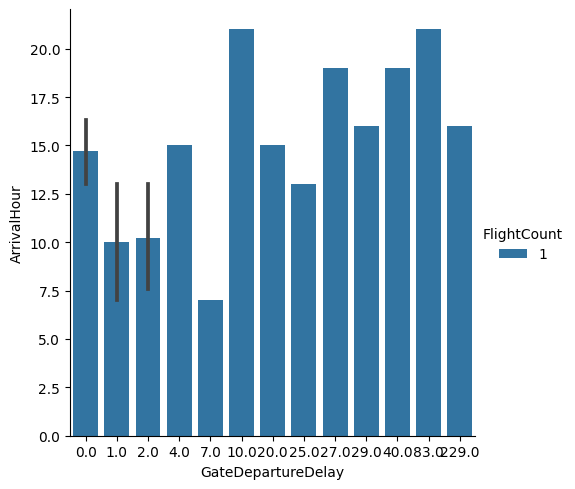

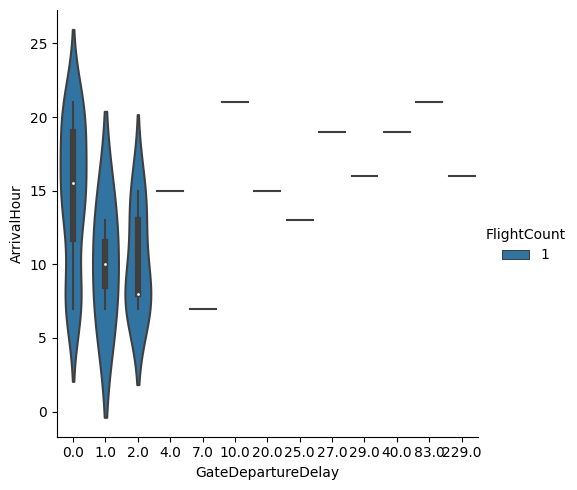

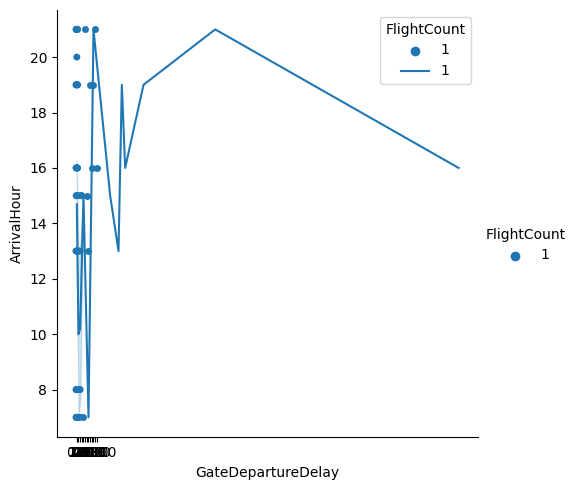

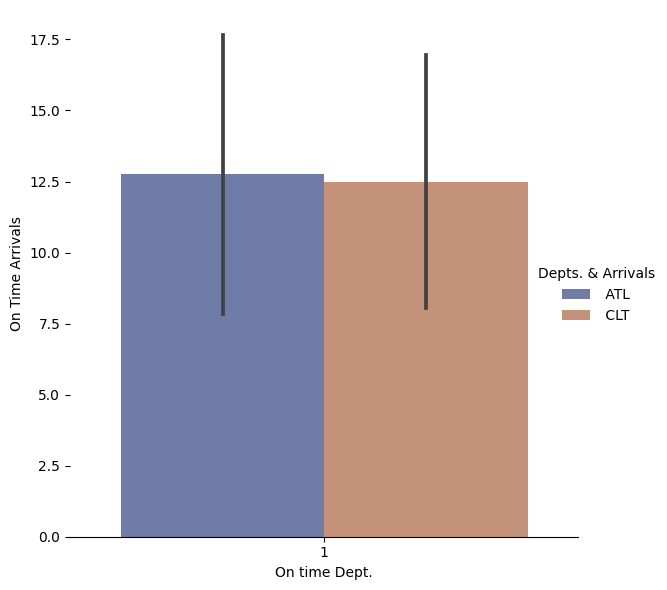

In [65]:
import warnings
from typing import Literal, Tuple

import seaborn as sns
from matplotlib import pyplot as plt
from pandas import DataFrame

warnings.filterwarnings("ignore")


def plt_catplot(
    data: DataFrame = None,
    xy_hue: Tuple[str, str, str] = None,
    save_as: str = None,
    plt_type: Literal["bar", "violin", "swarm"] = None,
):
    if plt_type in {"bar", "violin", "swarm"}:
        FIG = sns.catplot(data=data, kind=plt_type, x=xy_hue[0], y=xy_hue[1], hue=xy_hue[2])
        if save_as:
            FIG.savefig(save_as)
    elif not plt_type:
        for plttype in ["bar", "violin", "swarm"]:
            FIG2 = sns.catplot(data=data, kind=plttype, x=xy_hue[0], y=xy_hue[1], hue=xy_hue[2])
            FIG2.savefig(f"{plttype}.jpg")


XY_HUE = ("GateDepartureDelay", "ArrivalHour", "FlightCount")
with plt.ioff():
    # bar, swarm, and violin plots
    plt_catplot(DATA, XY_HUE)

    # line plot
    fig = sns.lineplot(x=XY_HUE[0], y=XY_HUE[1], hue=XY_HUE[2], data=DATA)
    fig = fig.get_figure()
    fig.savefig("lineplot.jpg")

# final plot: grouped barplot
X, Y, HUE = "FlightCount", "DepartureHour", "Arrival"
G = sns.catplot(
    data=DATA,
    kind="bar",
    x=X,
    y=Y,
    hue=HUE,
    errorbar="sd",
    palette="dark",
    alpha=0.6,
    height=6,
)

G.despine(left=True)
G.set_axis_labels("On time Dept.", "On Time Arrivals")
G.legend.set_title("Depts. & Arrivals")
G.savefig("grouped_bar.jpg")